<a href="https://colab.research.google.com/github/Joshuaogaga/Mental-Health-Prediction/blob/main/Mentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#pip install --upgrade notebook

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Importing dataset
data = pd.read_csv('/content/survey.csv')

In [3]:
data.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [4]:
data.isnull().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [5]:
#sns.heatmap(data, annot=True, cmap='viridis')

In [6]:
#Drop missing values
data = data.drop(['comments','state','Timestamp'], axis = 1)
data.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NaN,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [7]:
data.isnull().sum()

Age                            0
Gender                         0
Country                        0
self_employed                 18
family_history                 0
treatment                      0
work_interfere               264
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
dtype: int64

In [8]:
data['Gender'].value_counts()

Gender
Male                                              615
male                                              206
Female                                            121
M                                                 116
female                                             62
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Male                                                3
Woman                                               3
Cis Male                                            2
Man                                                 2
Female (trans)                                      2
Female                                              2
Trans woman                                         1
msle                                                1
male leaning androgynous                            1
Neuter               

In [9]:
data['Gender'] = data['Gender'].replace(('Female','Cis Female', 'Woman','Female ', 'f', 'Femake', 'woman','femail','female','Female (cis)','F'), 'Female')
data['Gender'] = data['Gender'].replace(('M', 'Male', 'male','Male ,' 'Man','m','Male ',"msle",'Cis Man', 'Malr','Mail', 'Man','Male-ish','maile','Mal','cis male','All','Cis Male','Male (CIS)', 'Make'),'Male')
data['Gender'] = data['Gender'].replace(('Trans-female','ostensibly male,','Neuter','ostensibly male, unsure what that really means', 'queer', 'unsure what that really means','Female (trans)', 'queer''Trans woman','something kinda male?','All','queer/she/they''Androgyne',
       'Agender', 'Guy (-ish) ^_^', 'Nah','unsure what that really means','Trans woman','male leaning androgynous' ,'Enby','Trans woman''Trans woman','cis-female/femme','queer/she/they', 'Androgyne', 'fluid', 'Genderqueer','Nah''queer/she/they','non-binary','p','A little about you'),'Other')


In [10]:
data['Gender'].value_counts()

Gender
Male      992
Female    246
Other      21
Name: count, dtype: int64

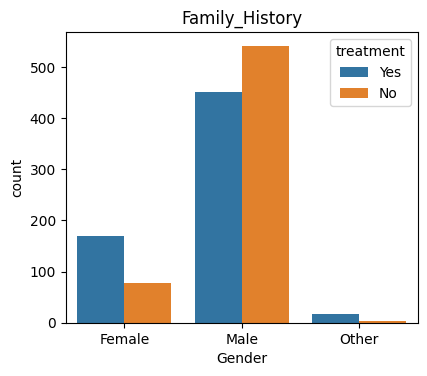

In [11]:
plt.figure(figsize=(10, 40))
plt.subplot(9, 2, 2)
sns.countplot(x='Gender', hue='treatment', data=data)
plt.title('Family_History')

plt.show()
#Gender distribution history of mental health conditions

In [12]:
data['no_employees'].value_counts()

no_employees
6-25              290
26-100            289
More than 1000    282
100-500           176
1-5               162
500-1000           60
Name: count, dtype: int64

In [13]:
data['no_employees'].replace("More than 1000", ">1000", inplace=True)

In [14]:
data['no_employees'].value_counts()

no_employees
6-25        290
26-100      289
>1000       282
100-500     176
1-5         162
500-1000     60
Name: count, dtype: int64

In [15]:
data['leave'].value_counts()

leave
Don't know            563
Somewhat easy         266
Very easy             206
Somewhat difficult    126
Very difficult         98
Name: count, dtype: int64

In [16]:
data['mental_health_interview'].value_counts()

mental_health_interview
No       1008
Maybe     207
Yes        44
Name: count, dtype: int64

In [17]:
# fill null values
data['self_employed'].fillna('NaN',inplace= True)
data['work_interfere'].fillna('NaN',inplace= True)

In [18]:
# replace NaN Value into No
data['self_employed']= data['self_employed'].replace('NaN','No')
data['self_employed'].value_counts()

self_employed
No     1113
Yes     146
Name: count, dtype: int64

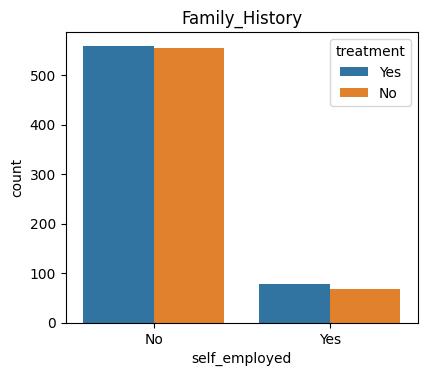

In [19]:
plt.figure(figsize=(10, 40))
plt.subplot(9, 2, 2)
sns.countplot(x='self_employed', hue='treatment', data=data)
plt.title('Family_History')

plt.show()
#Individuals with self employed history of mental health conditions

In [20]:
data['work_interfere']= data['work_interfere'].replace('NaN', 'Don\tknow')
data['work_interfere'].value_counts()

work_interfere
Sometimes    465
Don\tknow    264
Never        213
Rarely       173
Often        144
Name: count, dtype: int64

Text(0.5, 1.0, 'Work Interference with Mental Health Treatment')

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


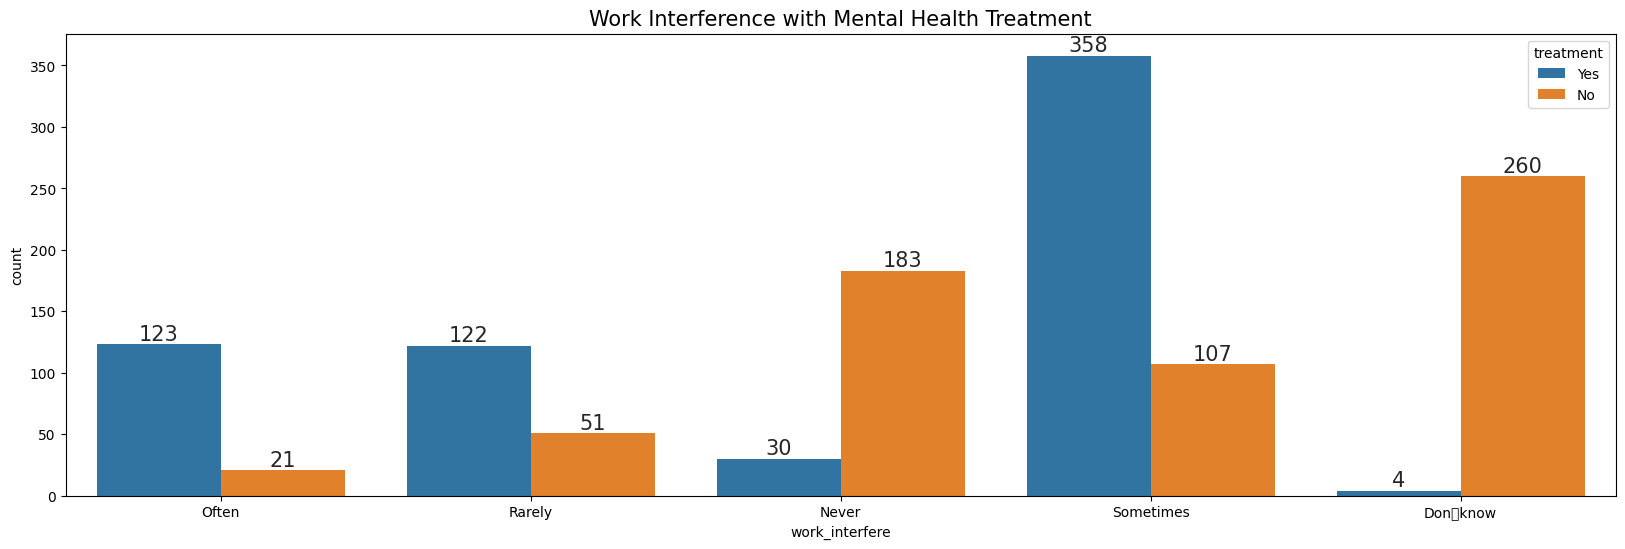

In [21]:
plt.figure(figsize = (20,6))
ax = sns.countplot(x ='work_interfere' ,data = data, hue ='treatment')
sns.set(font_scale=1.25)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Work Interference with Mental Health Treatment')

In [22]:
data['Age'].unique()

array([         37,          44,          32,          31,          33,
                35,          39,          42,          23,          29,
                36,          27,          46,          41,          34,
                30,          40,          38,          50,          24,
                18,          28,          26,          22,          19,
                25,          45,          21,         -29,          43,
                56,          60,          54,         329,          55,
       99999999999,          48,          20,          57,          58,
                47,          62,          51,          65,          49,
             -1726,           5,          53,          61,           8,
                11,          -1,          72])

In [23]:
data.drop(data[data['Age']<0].index, inplace = True)
data.drop(data[data['Age']>99].index, inplace = True)

data['Age'].unique()

array([37, 44, 32, 31, 33, 35, 39, 42, 23, 29, 36, 27, 46, 41, 34, 30, 40,
       38, 50, 24, 18, 28, 26, 22, 19, 25, 45, 21, 43, 56, 60, 54, 55, 48,
       20, 57, 58, 47, 62, 51, 65, 49,  5, 53, 61,  8, 11, 72])

<ipython-input-24-a9b381ededa4>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Age"])


Text(0.5, 0, 'Age')

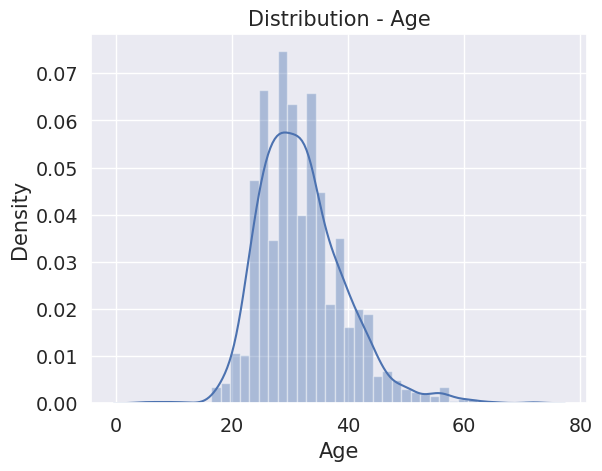

In [24]:
#Exploratory Data Analysis

#mental health treatment distribution by age
sns.distplot(data["Age"])
plt.title("Distribution - Age")
plt.xlabel("Age")

#The majority of individuals grappling with mental health issues fall within
# the age range of 25 to 35

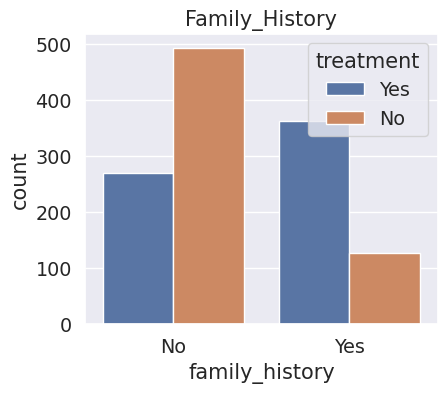

In [25]:
plt.figure(figsize=(10, 40))
plt.subplot(9, 2, 2)
sns.countplot(x='family_history', hue='treatment', data=data)
plt.title('Family_History')

plt.show()
#Individuals with a documented family history of mental health conditions
#exhibit a higher proclivity towards seeking treatment compared to those without such familial predispositions.

Text(0.5, 1.0, 'Workplace Wellness vs. Help-Seeking: A Comparison')

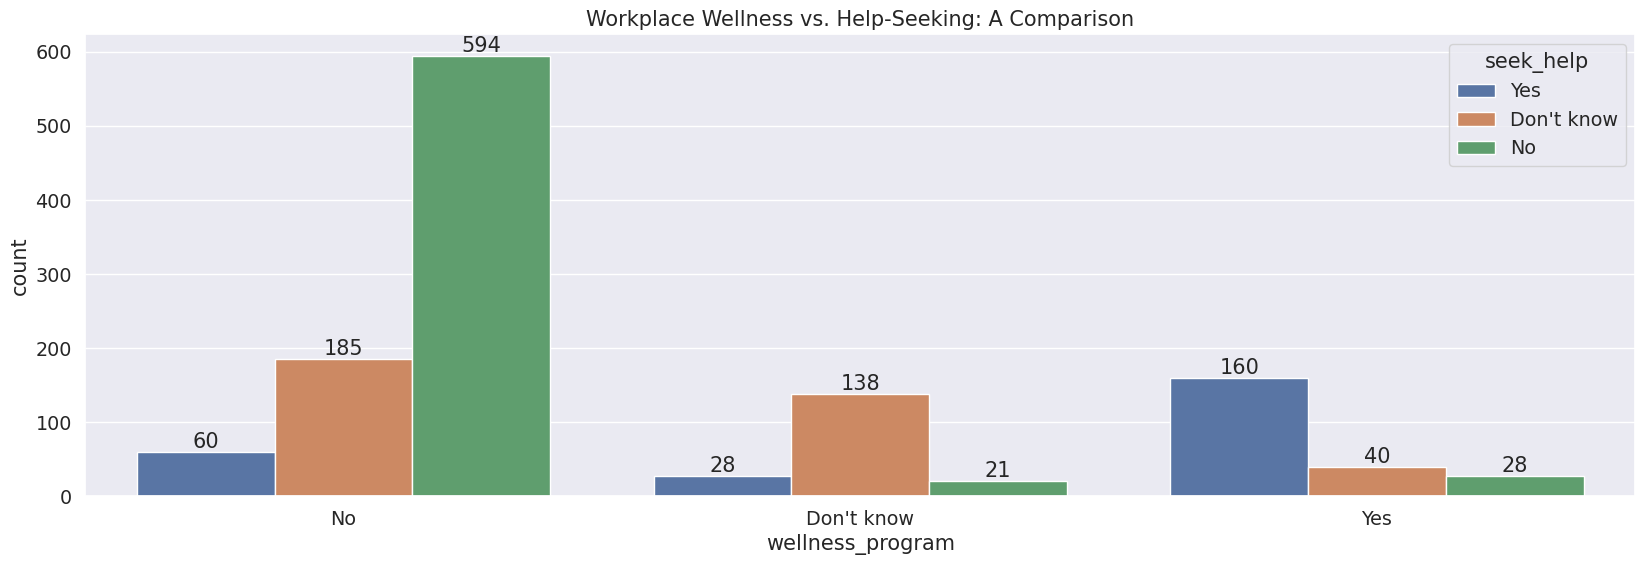

In [26]:
#In this plot We can see relation between wellness program and seek help.
plt.figure(figsize = (20,6))
ax = sns.countplot(x ='wellness_program' ,data = data,hue ='seek_help')
sns.set(font_scale=1.25)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Workplace Wellness vs. Help-Seeking: A Comparison')

#   Examining the countplot reveals that organizations with well-established
#  wellness programs tend to increase the employee engagement in
#         proactively seeking assistance for mental health concerns.

In [27]:
#seperate categorical data and numerical data
data_cat = data.select_dtypes(object)

In [28]:
data_cat.head()

,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,Female,United States,No,No,Yes,Often,6-25,No,Yes,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,Male,United States,No,No,No,Rarely,>1000,No,No,Don't know,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,Male,Canada,No,No,No,Rarely,6-25,No,Yes,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,Male,United Kingdom,No,Yes,Yes,Often,26-100,No,Yes,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,Male,United States,No,No,No,Never,100-500,Yes,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [29]:
data_num = data.select_dtypes(['int64','float64'])

In [30]:
data_num.head()

,Age
0,37
1,44
2,32
3,31
4,31


In [32]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder

In [33]:
for col in data_cat:
    le = LabelEncoder()
    data_cat[col] = le.fit_transform(data_cat[col])

In [34]:
data_cat.head()

,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,0,45,0,0,1,2,4,0,1,2,...,2,2,1,1,1,2,1,0,2,0
1,1,45,0,0,0,3,5,0,0,0,...,0,0,0,1,0,0,1,1,0,0
2,1,7,0,0,0,3,4,0,1,1,...,0,1,1,1,2,2,2,2,1,0
3,1,44,0,1,1,2,2,0,1,1,...,1,1,2,2,1,0,0,0,1,1
4,1,45,0,0,0,1,1,1,1,2,...,0,0,1,1,1,2,2,2,0,0


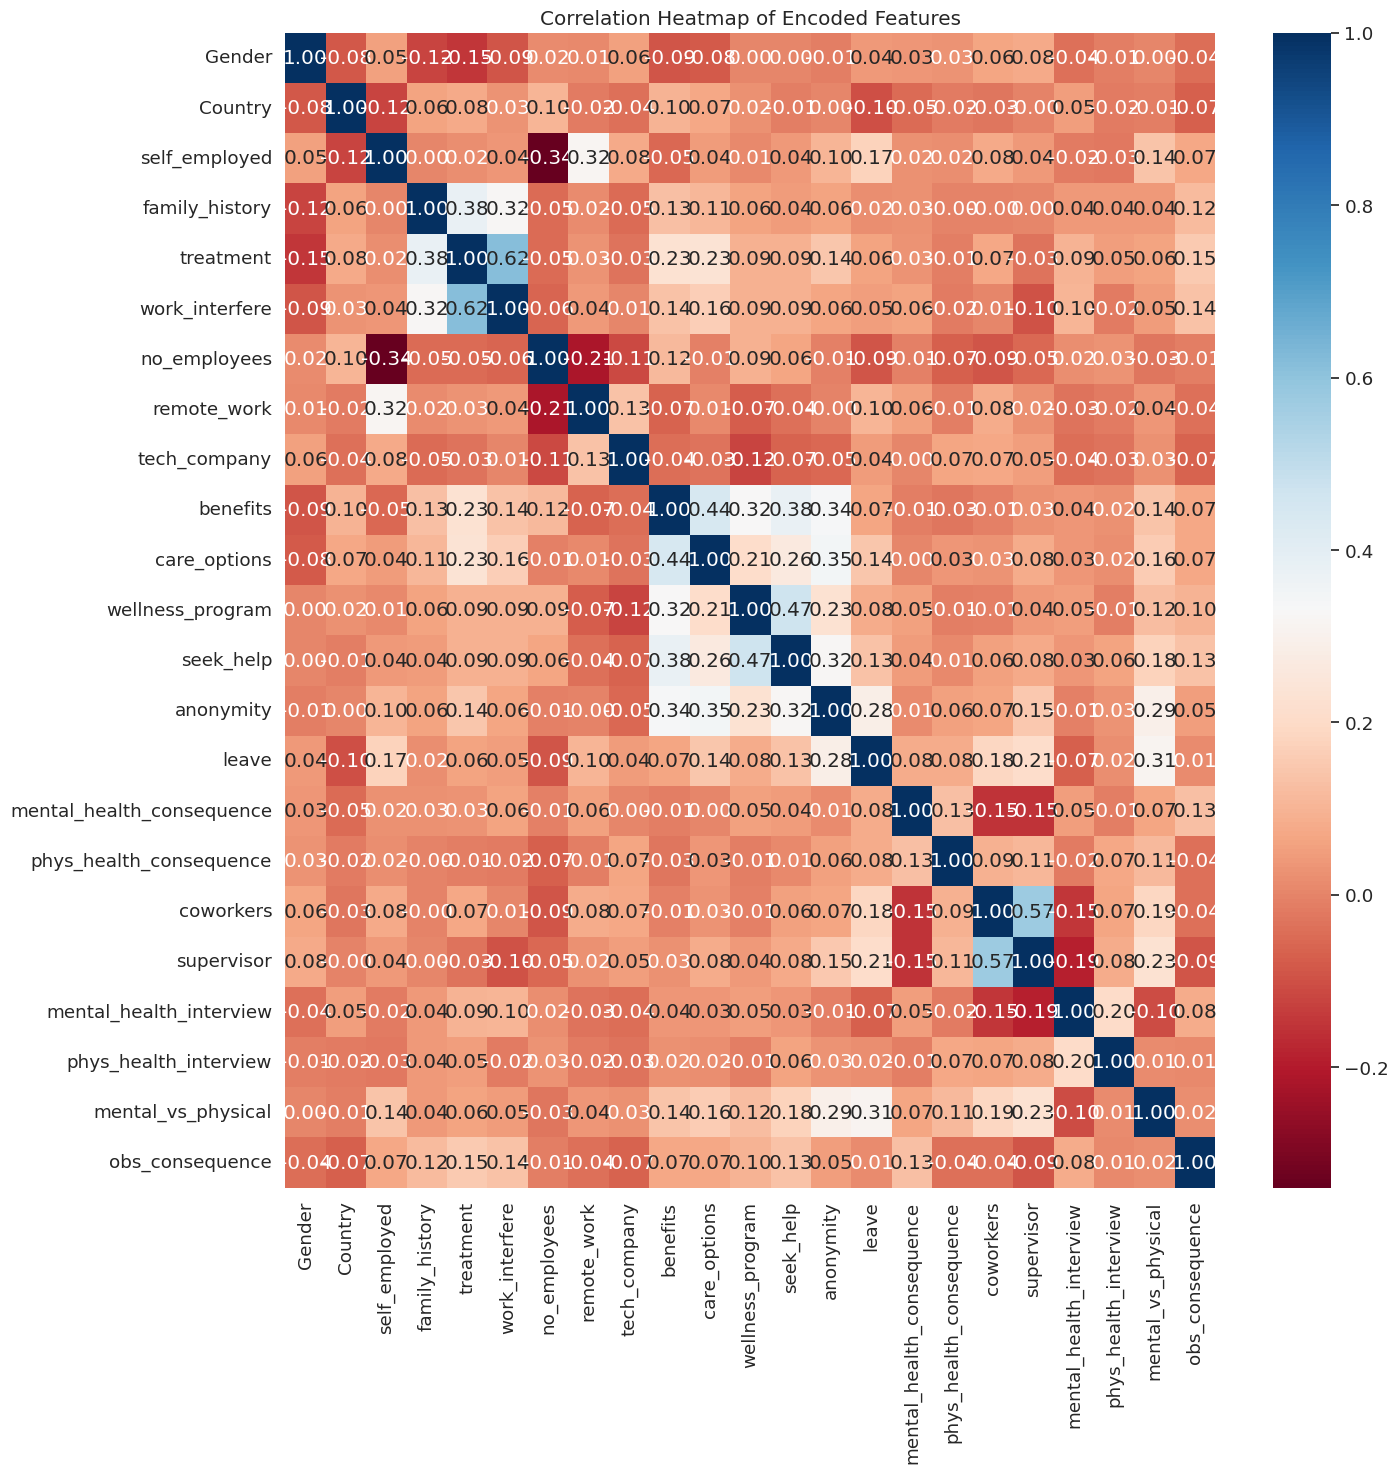

In [35]:
# Correlation heatmap
plt.figure(figsize=(15, 15))
sns.set(font_scale=1.2)
sns.heatmap(data_cat.corr().T, fmt=".2f", annot=True, cmap='RdBu')
plt.title('Correlation Heatmap of Encoded Features')
plt.show()

In [36]:
#Looking at our heatmap, its safe to predict using this variables.

In [37]:
data = pd.merge(data_cat, data_num, how="outer", left_index=True, right_index=True)

In [38]:
data.head()

,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,Age
0,0,45,0,0,1,2,4,0,1,2,...,2,1,1,1,2,1,0,2,0,37
1,1,45,0,0,0,3,5,0,0,0,...,0,0,1,0,0,1,1,0,0,44
2,1,7,0,0,0,3,4,0,1,1,...,1,1,1,2,2,2,2,1,0,32
3,1,44,0,1,1,2,2,0,1,1,...,1,2,2,1,0,0,0,1,1,31
4,1,45,0,0,0,1,1,1,1,2,...,0,1,1,1,2,2,2,0,0,31


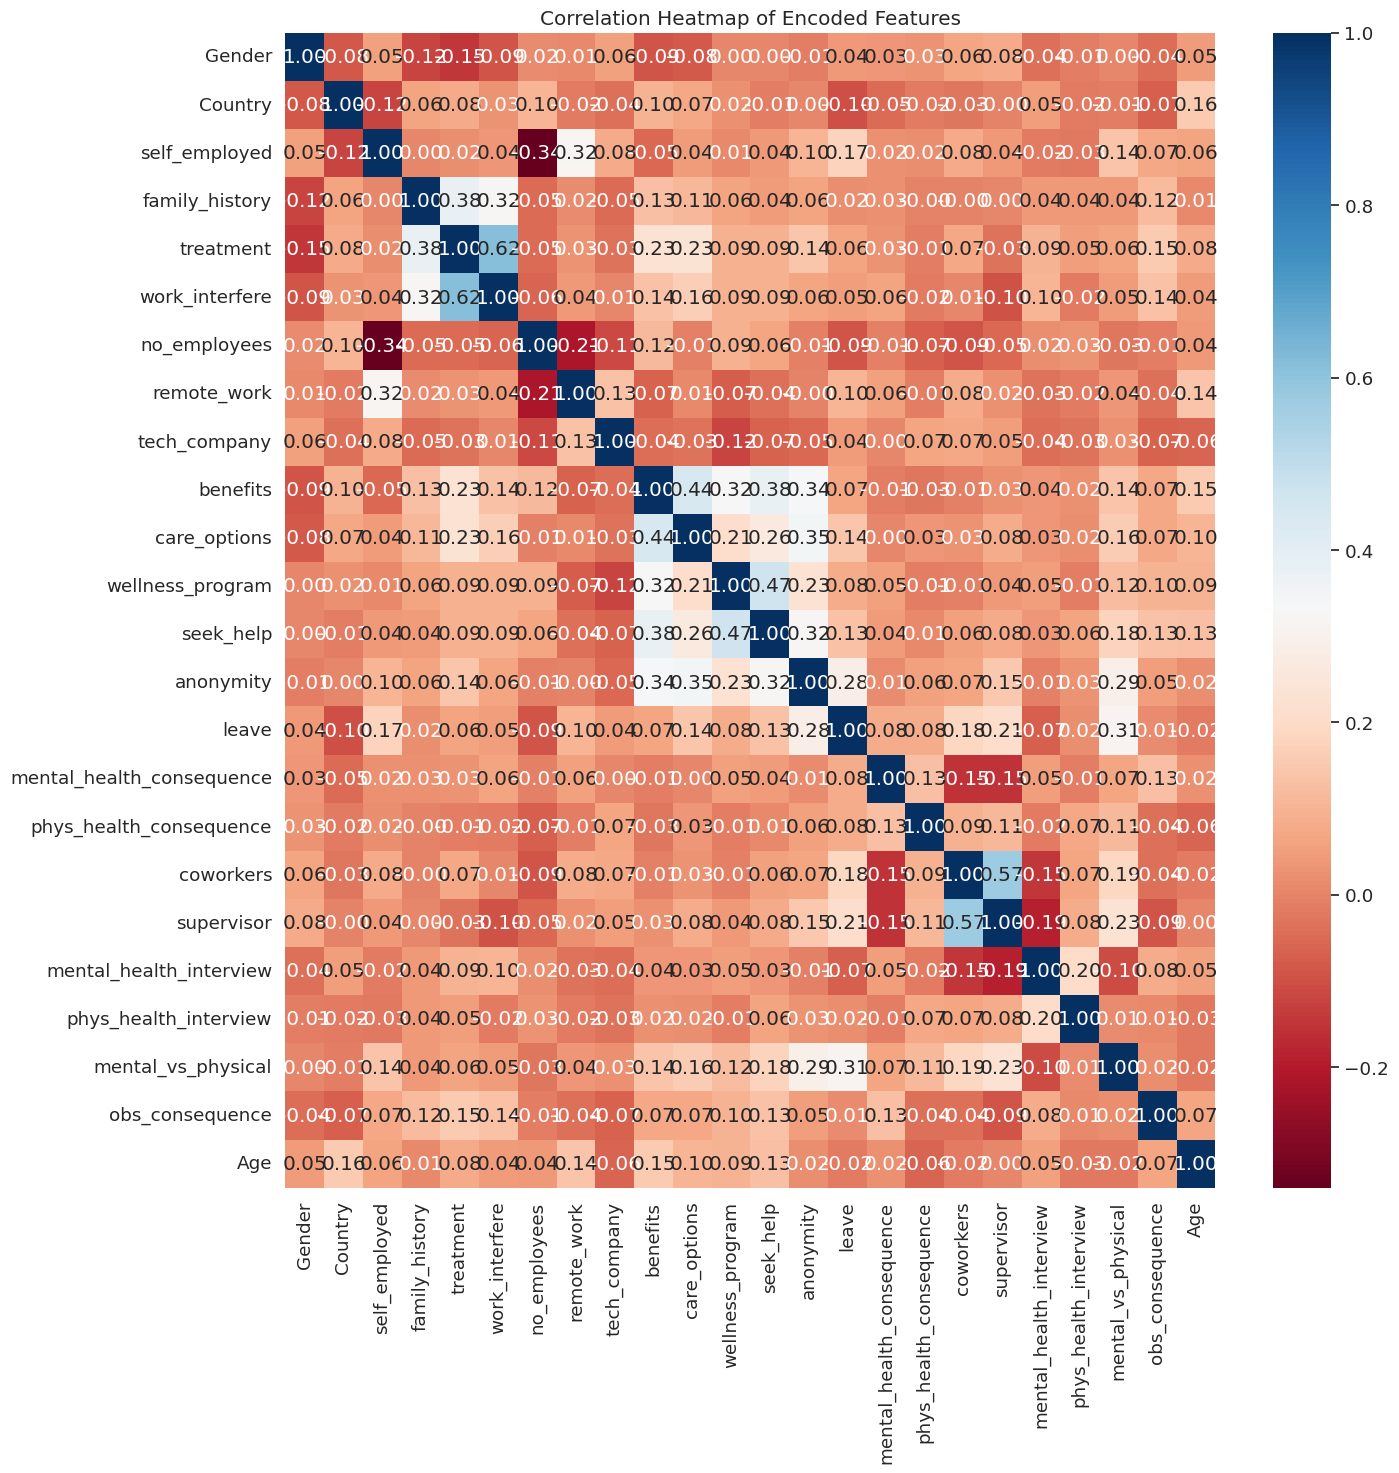

In [39]:
# Correlation heatmap
plt.figure(figsize=(15, 15))
sns.set(font_scale=1.2)
sns.heatmap(data.corr().T, fmt=".2f", annot=True, cmap='RdBu')
plt.title('Correlation Heatmap of Encoded Features')
plt.show()

In [40]:
abs(data.corr()['treatment'])

Gender                       0.146456
Country                      0.076551
self_employed                0.016564
family_history               0.378069
treatment                    1.000000
work_interfere               0.615324
no_employees                 0.047002
remote_work                  0.026919
tech_company                 0.032859
benefits                     0.226160
care_options                 0.234806
wellness_program             0.092486
seek_help                    0.090009
anonymity                    0.142462
leave                        0.059826
mental_health_consequence    0.027866
phys_health_consequence      0.013064
coworkers                    0.069946
supervisor                   0.033276
mental_health_interview      0.094744
phys_health_interview        0.051138
mental_vs_physical           0.061378
obs_consequence              0.154541
Age                          0.075266
Name: treatment, dtype: float64

This correlation result provides insights into the relationship between various categorical variables and the target variable 'treatment', which represents whether an individual seeks treatment for mental health issues.

Strong Positive Correlations:
family_history (0.378): Indicates a moderate positive correlation, suggesting that individuals with a family history of mental health issues are more likely to seek treatment.

work_interfere (0.615): Indicates a strong positive correlation, implying that individuals who report that their work interferes with their mental health are more likely to seek treatment.

Moderate Positive Correlations:
benefits (0.226) and care_options (0.235): Suggest that the availability of benefits and care options in the workplace may influence the likelihood of seeking treatment.

anonymity (0.142) and obs_consequence (0.155): Indicate a moderate positive correlation, suggesting that concerns about anonymity and consequences may influence treatment-seeking behavior.

Weak Positive Correlations:
Gender (0.146), seek_help (0.090), wellness_program (0.092), mental_health_interview (0.095): Indicate weak positive correlations, suggesting that these factors may have some influence on treatment-seeking behavior but to a lesser extent.

Weak or No Correlations:
Country, self_employed, no_employees, remote_work, tech_company, leave, mental_health_consequence, phys_health_consequence, coworkers, supervisor, phys_health_interview, mental_vs_physical, Age: These variables show weak or no correlations with the treatment variable.

Overall, variables like family history, perceived work interference, availability of benefits and care options, anonymity, and observed consequences show stronger correlations with treatment-seeking behavior.

These insights can be valuable for understanding factors influencing mental health treatment decisions and for developing targeted interventions or policies to promote mental health support in the workplace.

In [41]:
data.describe()

,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,Age
count,1254.000000,1254.000000,1254.000000,1254.000000,1254.000000,1254.000000,1254.000000,1254.000000,1254.000000,1254.000000,...,1254.000000,1254.000000,1254.000000,1254.000000,1254.000000,1254.000000,1254.000000,1254.000000,1254.000000,1254.000000
mean,0.819777,37.763158,0.114833,0.390750,0.504785,2.288676,2.785486,0.297448,0.819777,1.052632,...,1.409888,0.850877,0.829346,0.972887,1.098884,0.868421,0.716906,0.814992,0.145136,32.019139
std,0.424010,13.338393,0.318947,0.488113,0.500177,1.595459,1.738558,0.457318,0.384527,0.837340,...,1.507978,0.766994,0.485611,0.619630,0.843613,0.425906,0.723840,0.834740,0.352378,7.375005
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
25%,1.000000,42.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,27.000000
50%,1.000000,45.000000,0.000000,0.000000,1.000000,3.000000,3.000000,0.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,31.000000
75%,1.000000,45.000000,0.000000,1.000000,1.000000,4.000000,4.000000,1.000000,1.000000,2.000000,...,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,0.000000,36.000000
max,2.000000,46.000000,1.000000,1.000000,1.000000,4.000000,5.000000,1.000000,1.000000,2.000000,...,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,72.000000


In [42]:
#pip install xgboost

In [43]:
from sklearn.preprocessing import LabelEncoder, MaxAbsScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [44]:
data['Country'] = StandardScaler().fit_transform(data[['Country']])
data['work_interfere'] = StandardScaler().fit_transform(data[['work_interfere']])
data['no_employees'] = StandardScaler().fit_transform(data[['no_employees']])
data['leave'] = StandardScaler().fit_transform(data[['leave']])
data['Age'] = MaxAbsScaler().fit_transform(data[['Age']])
data.isnull().sum()

Gender                       0
Country                      0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
Age                          0
dtype: int64

In [45]:
data.describe()

,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,Age
count,1254.000000,1.254000e+03,1254.000000,1254.000000,1254.000000,1.254000e+03,1.254000e+03,1254.000000,1254.000000,1254.000000,...,1.254000e+03,1254.000000,1254.000000,1254.000000,1254.000000,1254.000000,1254.000000,1254.000000,1254.000000,1254.000000
mean,0.819777,-2.266484e-17,0.114833,0.390750,0.504785,-1.161573e-16,-6.516142e-17,0.297448,0.819777,1.052632,...,-7.932694e-17,0.850877,0.829346,0.972887,1.098884,0.868421,0.716906,0.814992,0.145136,0.444710
std,0.424010,1.000399e+00,0.318947,0.488113,0.500177,1.000399e+00,1.000399e+00,0.457318,0.384527,0.837340,...,1.000399e+00,0.766994,0.485611,0.619630,0.843613,0.425906,0.723840,0.834740,0.352378,0.102431
min,0.000000,-2.832292e+00,0.000000,0.000000,0.000000,-1.435066e+00,-1.602822e+00,0.000000,0.000000,0.000000,...,-9.353262e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.069444
25%,1.000000,3.177693e-01,0.000000,0.000000,0.000000,-8.080372e-01,-1.027403e+00,0.000000,1.000000,0.000000,...,-9.353262e-01,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.375000
50%,1.000000,5.427737e-01,0.000000,0.000000,1.000000,4.460205e-01,1.234352e-01,0.000000,1.000000,1.000000,...,-2.719217e-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.430556
75%,1.000000,5.427737e-01,0.000000,1.000000,1.000000,1.073049e+00,6.988541e-01,1.000000,1.000000,2.000000,...,3.914827e-01,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,0.000000,0.500000
max,2.000000,6.177752e-01,1.000000,1.000000,1.000000,1.073049e+00,1.274273e+00,1.000000,1.000000,2.000000,...,1.718291e+00,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000


So with respect to our correlation analysis, we will be dropping variables with weak or no correlation with treatment factor. Will exclude Age as i believe age also is a factor that should be considered.

In [46]:
# List of weakly or non-correlated variables
weak_correlation_vars = ['Country', 'self_employed', 'no_employees', 'remote_work', 'tech_company',
                         'leave', 'mental_health_consequence', 'phys_health_consequence', 'coworkers',
                         'supervisor', 'phys_health_interview', 'mental_vs_physical']

# Drop weakly or non-correlated variables from the dataset
data.drop(columns=weak_correlation_vars, inplace=True)


In [47]:
data.head()

,Gender,family_history,treatment,work_interfere,benefits,care_options,wellness_program,seek_help,anonymity,mental_health_interview,obs_consequence,Age
0,0,0,1,-0.181008,2,1,1,2,2,1,0,0.513889
1,1,0,0,0.446021,0,0,0,0,0,1,0,0.611111
2,1,0,0,0.446021,1,0,1,1,0,2,0,0.444444
3,1,1,1,-0.181008,1,2,1,1,1,0,1,0.430556
4,1,0,0,-0.808037,2,0,0,0,0,2,0,0.430556


In [48]:
# Spliting target variable and independent variables
X = data.drop(['treatment'], axis = 1)
y = data['treatment']

In [49]:
X.head()

,Gender,family_history,work_interfere,benefits,care_options,wellness_program,seek_help,anonymity,mental_health_interview,obs_consequence,Age
0,0,0,-0.181008,2,1,1,2,2,1,0,0.513889
1,1,0,0.446021,0,0,0,0,0,1,0,0.611111
2,1,0,0.446021,1,0,1,1,0,2,0,0.444444
3,1,1,-0.181008,1,2,1,1,1,0,1,0.430556
4,1,0,-0.808037,2,0,0,0,0,2,0,0.430556


In [50]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [51]:
#Start training the model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, precision_score, recall_score

model1 = LogisticRegression(solver='liblinear')
model1.fit(X_train, y_train)

y_2= model1.predict(X_test)
LR = accuracy_score(y_true=y_test, y_pred=y_2)*100
print('Logistic accuracy :', accuracy_score(y_true=y_test, y_pred=y_2)*100)

Logistic accuracy : 78.98089171974523


In [52]:
def compare_models_train_test():
    models = [
        LogisticRegression(solver='liblinear'),
        SVC(kernel='linear'),
        KNeighborsClassifier(),
        RandomForestClassifier(n_estimators=40),
        XGBClassifier(learning_rate=0.05, n_estimators=1000),
        DecisionTreeClassifier(),
        AdaBoostClassifier(random_state=49),
        GradientBoostingClassifier(random_state=49)
    ]

    results = {}

    for model in models:
        # Train the model
        model.fit(X_train, y_train)

        # Evaluate the model
        y_pred = model.predict(X_test)

        # Accuracy Score
        AC = accuracy_score(y_true=y_test, y_pred=y_pred) * 100

        # Store results in dictionary
        results[str(model)] = AC

        # Print Accuracy Score
        print('Accuracy Score of', model, '=', AC)

    return results


In [53]:
# Call the function
results_dict = compare_models_train_test()

Accuracy Score of LogisticRegression(solver='liblinear') = 78.98089171974523
Accuracy Score of SVC(kernel='linear') = 80.57324840764332
Accuracy Score of KNeighborsClassifier() = 78.343949044586
Accuracy Score of RandomForestClassifier(n_estimators=40) = 79.93630573248409
Accuracy Score of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
             

In [54]:
# Convert dictionary to DataFrame
df = pd.DataFrame(results_dict.items(), columns=['Model', 'Accuracy Score'])

# Print the DataFrame
print(df)

                                               Model  Accuracy Score
0             LogisticRegression(solver='liblinear')       78.980892
1                               SVC(kernel='linear')       80.573248
2                             KNeighborsClassifier()       78.343949
3            RandomForestClassifier(n_estimators=40)       79.936306
4  XGBClassifier(base_score=None, booster=None, c...       77.707006
5                           DecisionTreeClassifier()       73.248408
6                AdaBoostClassifier(random_state=49)       81.847134
7        GradientBoostingClassifier(random_state=49)       82.484076


In [55]:
from sklearn.model_selection import cross_val_score

In [56]:
#Cross Validation

In [57]:
#Logistic Regression
cv_score_LR = cross_val_score(LogisticRegression(solver='liblinear'), X, y, cv=10)
cv_score_LR

array([0.8015873 , 0.83333333, 0.80952381, 0.84126984, 0.792     ,
       0.808     , 0.832     , 0.856     , 0.768     , 0.704     ])

In [58]:
mean_accurancy_scoreLR = sum(cv_score_LR)/len(cv_score_LR) * 100
mean_accurancy_scoreLR

80.45714285714286

In [59]:
def compare_models_CV():
    models = [
        LogisticRegression(solver='liblinear'),
        SVC(kernel='linear'),
        KNeighborsClassifier(),
        RandomForestClassifier(n_estimators=40),
        XGBClassifier(learning_rate=0.05, n_estimators=1000),
        DecisionTreeClassifier(),
        AdaBoostClassifier(random_state=49),
        GradientBoostingClassifier(random_state=49)
    ]

    results = {}

    for model in models:
        # Train the model
        cv_score = cross_val_score(model, X, y, cv=10)

        #mean
        mean_accurancy = sum(cv_score)/len(cv_score) * 100

        # Store results in dictionary
        results[str(model)] = mean_accurancy

        # Print Accuracy Score
        print('Accuracy Score of', model, '=', mean_accurancy)

    return results

In [60]:
# Call the function
results_dict = compare_models_CV()

Accuracy Score of LogisticRegression(solver='liblinear') = 80.45714285714286
Accuracy Score of SVC(kernel='linear') = 81.01587301587301
Accuracy Score of KNeighborsClassifier() = 79.02412698412698
Accuracy Score of RandomForestClassifier(n_estimators=40) = 79.97714285714285
Accuracy Score of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
           

In [61]:
# Convert dictionary to DataFrame
df = pd.DataFrame(results_dict.items(), columns=['Model', 'CV Score'])

# Print the DataFrame
print(df)

                                               Model   CV Score
0             LogisticRegression(solver='liblinear')  80.457143
1                               SVC(kernel='linear')  81.015873
2                             KNeighborsClassifier()  79.024127
3            RandomForestClassifier(n_estimators=40)  79.977143
4  XGBClassifier(base_score=None, booster=None, c...  77.742857
5                           DecisionTreeClassifier()  73.441905
6                AdaBoostClassifier(random_state=49)  81.335873
7        GradientBoostingClassifier(random_state=49)  81.733333


In [62]:
#Hyperparameter Tuning

In [63]:
#Logistic Regression
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'],
    'max_iter': [100, 200, 300, 400, 500, 700, 1000],
    'class_weight': [None, 'balanced'],
    'multi_class': ['ovr', 'multinomial'],
    'random_state': [42]
}

# Create Logistic Regression classifier
log_reg = LogisticRegression()

# Perform grid search
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5)
grid_search.fit(X, y)

print("Best parameters found:", grid_search.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Best parameters found: {'C': 0.1, 'class_weight': None, 'max_iter': 100, 'multi_class': 'ovr', 'penalty': 'l2', 'random_state': 42, 'solver': 'liblinear'}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
3360 fits failed out of a total of 8400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
840 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: 

In [64]:
# Get the best model
best_model = grid_search.best_estimator_


y_pred_LR = best_model.predict(X_test)
# Evaluate the best model on the test data
LR = best_model.score(X_test, y_test) * 100
print("Test accuracy:", round(LR,2))

Test accuracy: 82.17


In [65]:
#SVC
from sklearn.model_selection import GridSearchCV

# Define parameters grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.1, 1, 10]
}

# Initialize the model
svc = SVC()

# Perform grid search
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5)
grid_search.fit(X, y)

print("Best parameters found:", grid_search.best_params_)

Best parameters found: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


In [66]:
# Get the best model
best_model = grid_search.best_estimator_

y_pred_SVC = best_model.predict(X_test)
# Evaluate the best model on the test data
SVC = best_model.score(X_test, y_test) * 100
print("Test accuracy:", round(SVC,2))

Test accuracy: 83.76


In [67]:
#KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 20, 30],
    'p': [1, 2]
}

# Create KNeighborsClassifier
knn_clf = KNeighborsClassifier()

# Perform grid search
grid_search = GridSearchCV(estimator=knn_clf, param_grid=param_grid, cv=5)
grid_search.fit(X, y)

print("Best parameters found:", grid_search.best_params_)

Best parameters found: {'algorithm': 'brute', 'leaf_size': 10, 'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}


In [68]:
# Get the best model
best_model = grid_search.best_estimator_

y_pred_KN = best_model.predict(X_test)
# Evaluate the best model on the test data
KN = best_model.score(X_test, y_test) * 100
print("Test accuracy:", round(KN,2))

Test accuracy: 82.48


In [69]:
#Random Forest
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define parameters grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10]
}

# Initialize the model
rf_classifier = RandomForestClassifier()

# Perform grid search
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X, y)

print("Best parameters found:", grid_search.best_params_)

Best parameters found: {'max_depth': 5, 'n_estimators': 50}


In [70]:
# Get the best model
best_model = grid_search.best_estimator_

y_pred_RF = best_model.predict(X_test)
# Evaluate the best model on the test data
RF = best_model.score(X_test, y_test) * 100
print("Test accuracy:", round(RF,2))

Test accuracy: 85.03


In [71]:
#DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'max_leaf_nodes': [None, 5, 10, 20],
    'min_impurity_decrease': [0.0, 0.1, 0.2],
}

# Create DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()

# Perform grid search
grid_search = GridSearchCV(estimator=dt_clf, param_grid=param_grid, cv=5)
grid_search.fit(X, y)

print("Best parameters found:", grid_search.best_params_)

Best parameters found: {'criterion': 'gini', 'max_depth': 3, 'max_features': 'sqrt', 'max_leaf_nodes': 10, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 5}


In [72]:
# Get the best model
best_model = grid_search.best_estimator_

y_pred_DT = best_model.predict(X_test)
# Evaluate the best model on the test data
DT = best_model.score(X_test, y_test) * 100
print("Test accuracy:", round(DT,2))

Test accuracy: 64.97


In [73]:
#AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.1, 0.5, 1.0],
    'algorithm': ['SAMME', 'SAMME.R'],
    'random_state': [42]
}

# Create AdaBoost classifier
ada_clf = AdaBoostClassifier()

# Perform grid search
grid_search = GridSearchCV(estimator=ada_clf, param_grid=param_grid, cv=5)
grid_search.fit(X, y)

print("Best parameters found:", grid_search.best_params_)

Best parameters found: {'algorithm': 'SAMME', 'learning_rate': 0.1, 'n_estimators': 50, 'random_state': 42}


In [74]:
# Get the best model
best_model = grid_search.best_estimator_

y_pred_ADB = best_model.predict(X_test)
# Evaluate the best model on the test data
ADB = best_model.score(X_test, y_test) * 100
print("Test accuracy:", round(ADB,2))

Test accuracy: 83.12


In [75]:
#GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.1, 0.5, 1.0],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'subsample': [0.8, 1.0],
    'random_state': [42]
}

# Create GradientBoostingClassifier
gb_clf = GradientBoostingClassifier()

# Perform grid search
grid_search = GridSearchCV(estimator=gb_clf, param_grid=param_grid, cv=5)
grid_search.fit(X, y)

print("Best parameters found:", grid_search.best_params_)

Best parameters found: {'learning_rate': 0.1, 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100, 'random_state': 42, 'subsample': 0.8}


In [76]:
# Get the best model
best_model = grid_search.best_estimator_

y_pred_GB = best_model.predict(X_test)
# Evaluate the best model on the test data
GB = best_model.score(X_test, y_test) * 100
print("Test accuracy:", round(GB,2))

Test accuracy: 85.35


In [77]:
#XGBClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [50, 100, 200],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2]
}

# Create XGBClassifier
xgb_clf = XGBClassifier()

# Perform grid search
grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, cv=5)
grid_search.fit(X, y)

print("Best parameters found:", grid_search.best_params_)

Best parameters found: {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.001, 'max_depth': 7, 'min_child_weight': 5, 'n_estimators': 50, 'subsample': 0.8}


In [78]:
# Get the best model
best_model = grid_search.best_estimator_

y_pred_XGB = best_model.predict(X_test)
# Evaluate the best model on the test data
XGB = best_model.score(X_test, y_test) * 100
print("Test accuracy:", round(XGB,2))

Test accuracy: 83.44


In [79]:
results_dict = {
    'Model': ['LogisticRegression','SupportVectorClassification','KNeighborsClassifier','RandomForestClassifier','XGBClassifier','DecisionTreeClassifier','AdaBoost', 'GradientBoosting'],
    'Accuracy': [LR,SVC,KN,RF,XGB,DT,ADB, GB]
}

# Create DataFrame from dictionary
results_df = pd.DataFrame(results_dict)

print(results_df)

                         Model   Accuracy
0           LogisticRegression  82.165605
1  SupportVectorClassification  83.757962
2         KNeighborsClassifier  82.484076
3       RandomForestClassifier  85.031847
4                XGBClassifier  83.439490
5       DecisionTreeClassifier  64.968153
6                     AdaBoost  83.121019
7             GradientBoosting  85.350318


In [80]:
#Calculate the F1, Recall and Precision

In [84]:
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def compute_scores(true_labels, predict_labels):
    f1 = f1_score(true_labels, predict_labels)
    precision = precision_score(true_labels, predict_labels)
    recall = recall_score(true_labels, predict_labels)
    confusion = confusion_matrix(true_labels, predict_labels)
    return f1, precision, recall, confusion

def plot_confusion_matrix(confusion, title='Confusion Matrix'):
    plt.figure(figsize=(6, 6))
    sns.heatmap(confusion, annot=True, fmt="d", cmap='Blues',
                xticklabels=['Predicted Negative', 'Predicted Positive'],
                yticklabels=['True Negative', 'True Positive'])
    plt.ylabel('Actual Class')
    plt.xlabel('Predicted Class')
    plt.title(title)
    plt.show()


===================LogisticRegression===================
F1-score: 0.8390804597701149
Precision: 0.8156424581005587
Recall: 0.863905325443787
Confusion_Matrix: [[112  33]
 [ 23 146]]


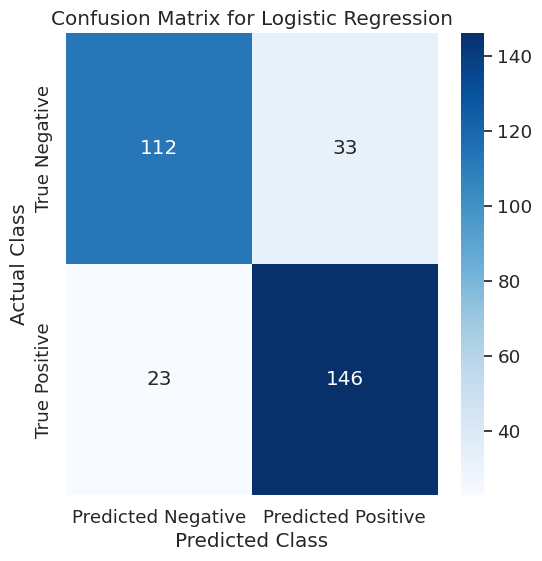

In [85]:
print('===================LogisticRegression===================')
f1_lr, precision_lr, recall_lr, confusion_lr = compute_scores(y_test, y_pred_LR)
print("F1-score:", f1_lr)
print("Precision:", precision_lr)
print("Recall:", recall_lr)
print("Confusion_Matrix:", confusion_lr)
plot_confusion_matrix(confusion_lr, 'Confusion Matrix for Logistic Regression')


===================SupportVectorClassification===================
F1-score: 0.859504132231405
Precision: 0.8041237113402062
Recall: 0.9230769230769231
Confusion_Matrix: [[107  38]
 [ 13 156]]


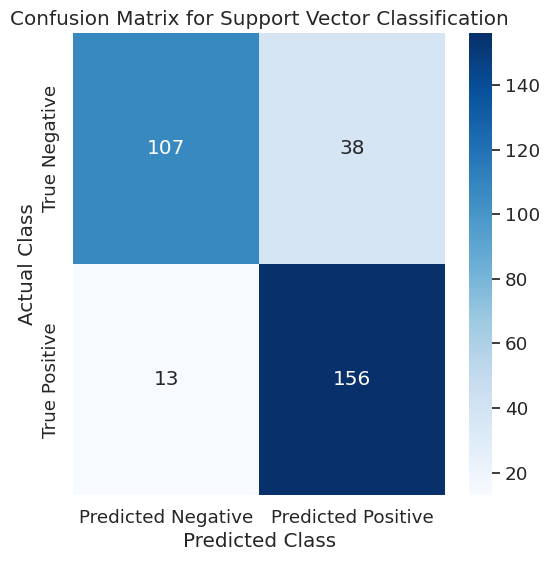

In [86]:
print('===================SupportVectorClassification===================')
f1_svc, precision_svc, recall_svc, confusion_svc = compute_scores(y_test, y_pred_SVC)
print("F1-score:", f1_svc)
print("Precision:", precision_svc)
print("Recall:", recall_svc)
print("Confusion_Matrix:", confusion_svc)
plot_confusion_matrix(confusion_svc, 'Confusion Matrix for Support Vector Classification')


===================KNeighborsClassifier===================
F1-score: 0.8414985590778098
Precision: 0.8202247191011236
Recall: 0.863905325443787
Confusion_Matrix: [[113  32]
 [ 23 146]]


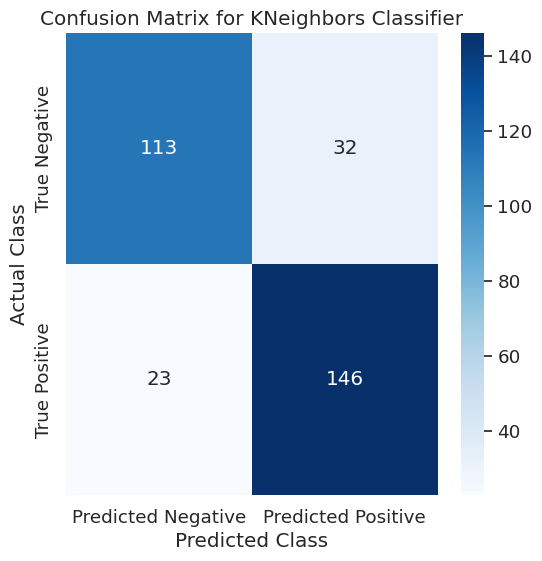

In [87]:
print('===================KNeighborsClassifier===================')
f1_kn, precision_kn, recall_kn, confusion_kn = compute_scores(y_test, y_pred_KN)
print("F1-score:", f1_kn)
print("Precision:", precision_kn)
print("Recall:", recall_kn)
print("Confusion_Matrix:", confusion_kn)
plot_confusion_matrix(confusion_kn, 'Confusion Matrix for KNeighbors Classifier')


===================RandomForestClassifier===================
F1-score: 0.8719346049046321
Precision: 0.8080808080808081
Recall: 0.9467455621301775
Confusion_Matrix: [[107  38]
 [  9 160]]


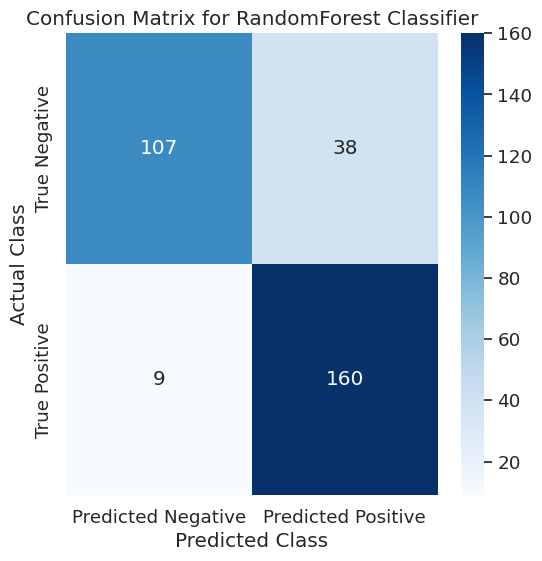

In [88]:
print('===================RandomForestClassifier===================')
f1_rf, precision_rf, recall_rf, confusion_rf = compute_scores(y_test, y_pred_RF)
print("F1-score:", f1_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("Confusion_Matrix:", confusion_rf)
plot_confusion_matrix(confusion_rf, 'Confusion Matrix for RandomForest Classifier')

===================XGBClassifier===================
F1-score: 0.858695652173913
Precision: 0.7939698492462312
Recall: 0.9349112426035503
Confusion_Matrix: [[104  41]
 [ 11 158]]


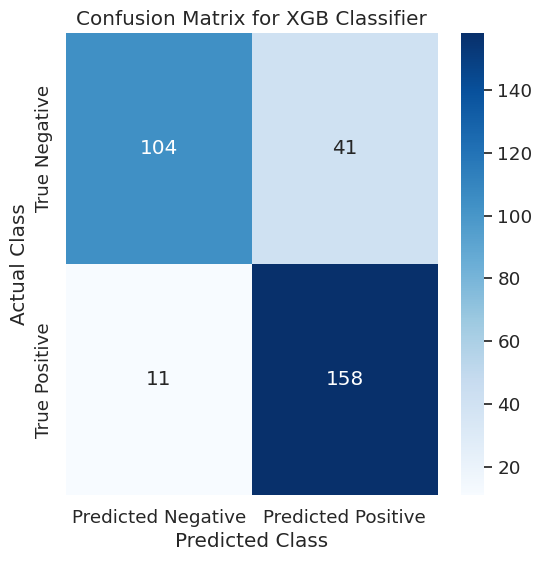

In [89]:
print('===================XGBClassifier===================')
f1_xgb, precision_xgb, recall_xgb, confusion_xgb = compute_scores(y_test, y_pred_XGB)
print("F1-score:", f1_xgb)
print("Precision:", precision_xgb)
print("Recall:", recall_xgb)
print("Confusion_Matrix:", confusion_xgb)
plot_confusion_matrix(confusion_xgb, 'Confusion Matrix for XGB Classifier')

===================DecisionTreeClassifier===================
F1-score: 0.5864661654135339
Precision: 0.8041237113402062
Recall: 0.46153846153846156
Confusion_Matrix: [[126  19]
 [ 91  78]]


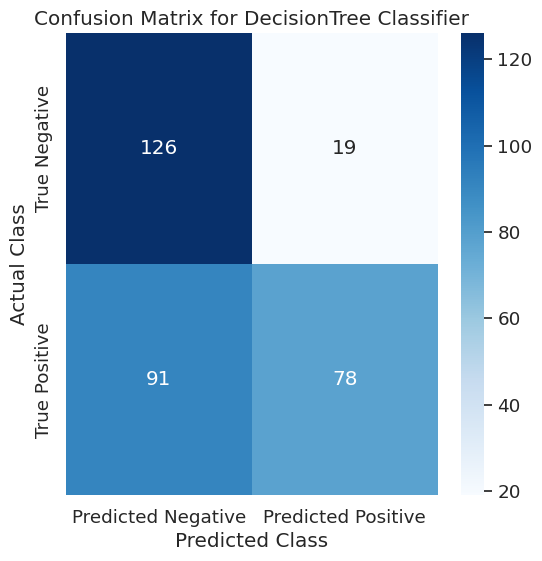

In [90]:
print('===================DecisionTreeClassifier===================')
f1_dt, precision_dt, recall_dt, confusion_dt = compute_scores(y_test, y_pred_DT)
print("F1-score:", f1_dt)
print("Precision:", precision_dt)
print("Recall:", recall_dt)
print("Confusion_Matrix:", confusion_dt)
plot_confusion_matrix(confusion_dt, 'Confusion Matrix for DecisionTree Classifier')

===================AdaBoostClassifier===================
F1-score: 0.856368563685637
Precision: 0.79
Recall: 0.9349112426035503
Confusion_Matrix: [[103  42]
 [ 11 158]]


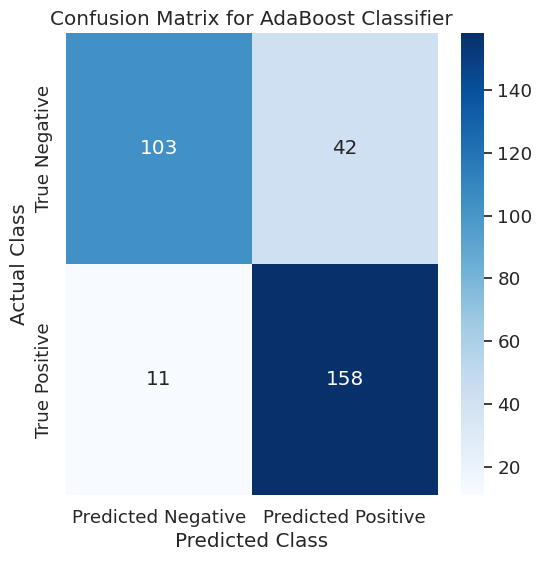

In [91]:
print('===================AdaBoostClassifier===================')
f1_adb, precision_adb, recall_adb, confusion_adb = compute_scores(y_test, y_pred_ADB)
print("F1-score:", f1_adb)
print("Precision:", precision_adb)
print("Recall:", recall_adb)
print("Confusion_Matrix:", confusion_adb)
plot_confusion_matrix(confusion_adb, 'Confusion Matrix for AdaBoost Classifier')

===================GradientBoostingClassifier===================
F1-score: 0.867816091954023
Precision: 0.8435754189944135
Recall: 0.893491124260355
Confusion_Matrix: [[117  28]
 [ 18 151]]


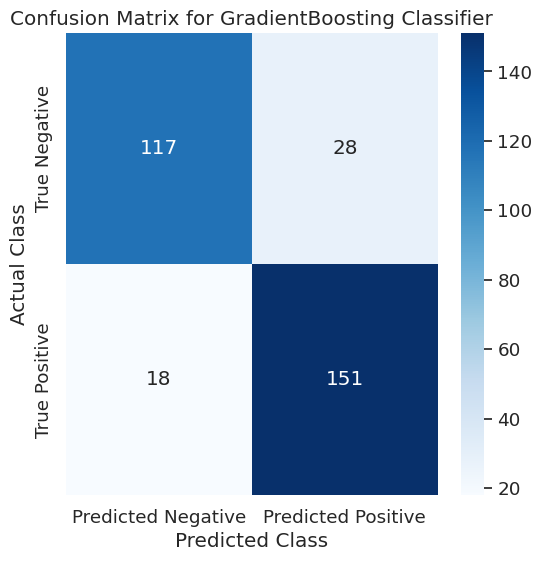

In [92]:
print('===================GradientBoostingClassifier===================')
f1_gb, precision_gb, recall_gb, confusion_gb = compute_scores(y_test, y_pred_GB)
print("F1-score:", f1_gb)
print("Precision:", precision_gb)
print("Recall:", recall_gb)
print("Confusion_Matrix:", confusion_gb)
plot_confusion_matrix(confusion_gb, 'Confusion Matrix for GradientBoosting Classifier')

Based on these metrics, the Random Forest Classifier, XGBoost Classifier, and Gradient Boosting Classifier perform relatively better compared to other models in terms of F1-score, Precision, and Recall. Therefore, these models are recommended for predictions on the given dataset.